In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Esercizio: Dalla Terra alla Luna

**Una BMW i8 accelera a tavoletta su un rettilineo**

<center>
<img src="assets/moonshot.jpg" width=30%/>
</center>

**Durante il viaggio, la navicella è soggetta a forze gravitazionali**

Esse sono regolate dalla legge di gravitazione di Newton:

$$
F_{12} = -G \frac{m_1 m_2}{r_{12} \|r_{12}\|}
$$

* $F_{12}$ è la forza esercitata dal corpo 2 sul corpo 1
* $G$ è la costante di gravitazione
* $m_1$ ed $m_2$ sono le masse del corpo 1 e 2
* $r_{12}$ è la distanza dal corpo 1 al corpo 2, i.e.
$$
r_{12} = x_1 - x_2
$$
* $x_1$ e $x_2$ sono le posizioni (scalari) di 1 e 2 (la forma vettoriale è diversa)


**Si desidera modellare il moto della navicella**

* Assumiamo per semplicità che la Terra e la Luna siano in fisse
* Quindi la nave viaggerà lungo una traiettoria verticale
* Il moto sarà regolato dell'equazione differenziale:

$$
\ddot{x} = \frac{1}{m_s} (F_{se} + F_{sm})
$$

* $m_s$ è la massa della navicella
* $F_{se}$ è l'attrazione esercitata dalla Terra sulla navicella
* $F_{sm}$ è l'attrazione esercitata dalla Luna sulla navicella


**Nel complesso, il sistema è descritto dell'ODE**

$$
\left(\begin{array}{c}
\dot{x} \\
\dot{v}
\end{array}\right)
=
\left(\begin{array}{c}
v \\
\frac{1}{m_s} (F_{se} + F_{sm})
\end{array}\right)
$$

Con:

$$\begin{align}
& F_{se} = - G \frac{m_s m_e}{x |x|} \\
& F_{sm} = - G \frac{m_s m_m}{(x-D) |x-D|}
\end{align}$$

Dove $D$ è la distanza tra il centro della Terra e della Luna

## Esercizio 1

**Nel modulo `sol.moonshot` definire la funzione**

```python
def dstate(X, t):
    # Parametri fissi
    G = 6.67408e-11 # Costante di gravitazione universale
    ME = 5.972e24 # Massa della Terra
    MM = 7.34767309e22 # Massa della Luna
    MS = 800 # Massa del "satellite"
    D = 384400e3 # Distanza Terra-Luna
    ...

```

* La funzione deve calcolare le espressioni che definiscono l'ODE
* I parametri indicati saranno considerati fissi nell'esercizio
* Il metodo deve restituire un array `numpy` con le due componenti della derivata

**Nel modulo `sol.moonshot` si definisca quindi la funzione:**

```python
def simulate(v0):
    rE = 6371e3 # Raggio della Terra
    x0 = [rE, v0]
    t = np.linspace(0, 3 * 3600, 3 * 3600 * 100)
    ...
```

* La funzione deve risolvere un problema ai valori iniziali
* ...Con lo stato iniziale ed il vettore dei tempi indicati
* Il metodo deve restituire
  - La matrice con gli stati visitati
  - Il vettore dei tempi visitati

Si collaudi la funzione per $v_0 = 11100$. Per verificare la correttezza dei risultati, può essere utile disegnare l'andamento dello stato usando la funzione `plot_state_evolution` nel modulo `base.util` incluso nel tema d'esame.

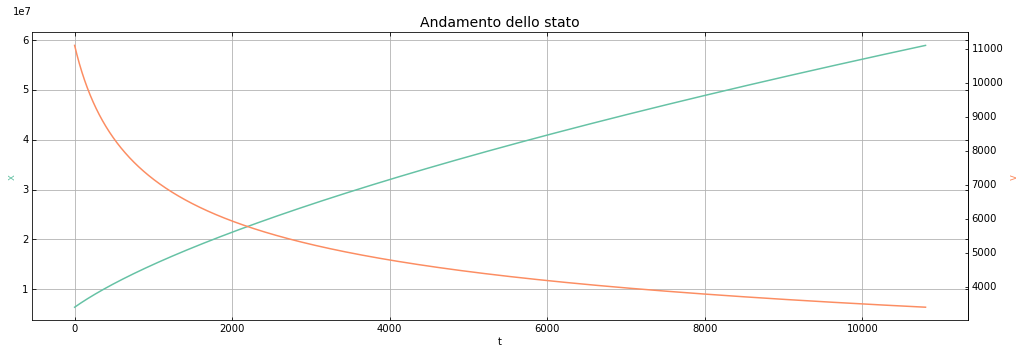

In [8]:
from sol import moonshot
from base import util

X, t = moonshot.simulate(v0=11100)
util.plot_state_evolution(X, t, xlabel='t', ylabels=['x', 'v'], figsize=(20, 5), title='Andamento dello stato')

## Esercizio 2

**Per una data distanza tra la navicella e la Terra, le due attrazioni gravitazionali si bilanciano. Ciò accade quando:**

$$
F(x) = F_{se}(x) + F_{sm}(x) = 0
$$

**Nel modulo `sol.moonshot` si definisca la funzione:**

```python
def find_balance_point_aux(x):
    # Parametri fissi
    G = 6.67408e-11 # Costante di gravitazione universale
    ME = 5.972e24 # Massa della Terra
    MM = 7.34767309e22 # Massa della Luna
    MS = 800 # Massa del "satellite"
    D = 384400e3 # Distanza Terra-Luna
    ...
```

* La funzione deve calcolare e restituire il valore di $F(x)$.

**Nel modulo `sol.moonshot` si definisca la funzione:**

```python
def find_balance_point():
    a, b = 1e6, 384e6
    ...
```

* La funzione deve utilizzare il metodo `scipy.optimize.brentq` per determinare il punto di equilibrio
* La funzione deve restituire il valore di $x$ al punto di equilibrio

In [9]:
x_eq = moonshot.find_balance_point()
print(f'Punto di equilibrio: {x_eq}')

Punto di equilibrio: 346019105.48119354


## Esercizio 3

**Nel modulo `sol.moonshot` si definisca la funzione**

```python
def distance_in_1h(v0):
    ...
```

* Che, dato un valore per $v_0$ calcoli la distanza percorsa in $1$ _ora_
* La funzione deve restituire tale valore di distanza

**Sia $F(v_0)$ la funzione appena definita. Nel modulo `sol.moonshot` si definisca la funzione:**

```python
def distances_for_v0_range(v0_range):
    ...
```

* La funzione riceve come ingresso una sequenza (va bene qualunque tipo) di valori per $v_0$
* La funzione deve restituire una sequenza (va bene qualunque tipo) con i valori di $F(v_0)$ corrsipondenti alle velocità passate in ingresso
* Si collaudi la funzione per `v0_range = np.linspace(9500, 12000)`

Per verificare la correttezza, si suggerisce di disegnare la curva $v_0, F(v_0)$ utilizzando per esempio la funzione `base.util.plot` fornita insieme al tema d'esame.

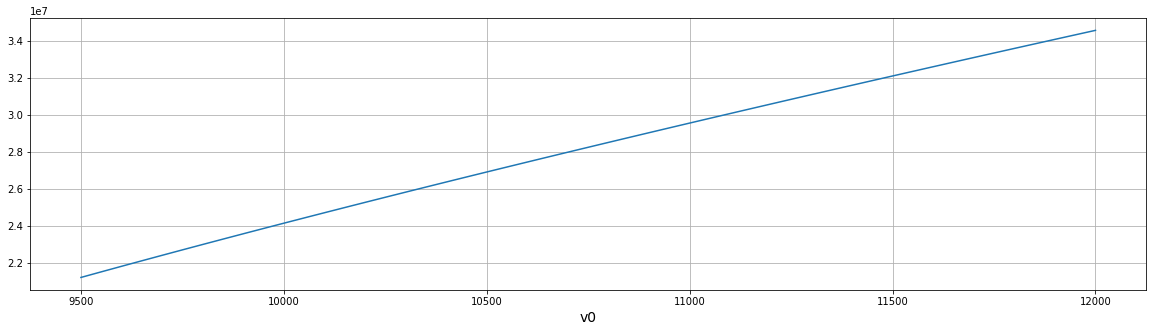

In [10]:
from base import util
import numpy as np

v0_range = np.linspace(9500, 12000)
x10_range = moonshot.distances_for_v0_range(v0_range)
util.plot(v0_range, x10_range, figsize=(20, 5), xlabel='v0', ylabel='')